In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
import scipy as scp
from iminuit import Minuit, cost
from IPython.core.display import Latex
import random
import pandas as pd
import statsmodels.api as sm 
from statsmodels.formula.api import ols 
from IPython.core.display import Latex

def lprint(*args,**kwargs):
    """Pretty print arguments as LaTeX using IPython display system 
    
    Parameters
    ----------
    args : tuple 
        What to print (in LaTeX math mode)
    kwargs : dict 
        optional keywords to pass to `display` 
    """
    display(Latex('$$'+' '.join(args)+'$$'),**kwargs)

### 5

#### 5.1

##### 5.1.1

Plotting the data and chacking background in [8,10].

In [6]:
dataframe = pd.read_csv('data_InconstantBackground.csv', header=0)
mask = dataframe['# Distance'] >= 8
dataframe[mask]


,# Distance
10,8.5684
66,8.7053
68,8.5068
108,8.3625
247,9.3341
...,...
21630,8.7930
21734,8.5359
21744,9.4308
21774,8.4495


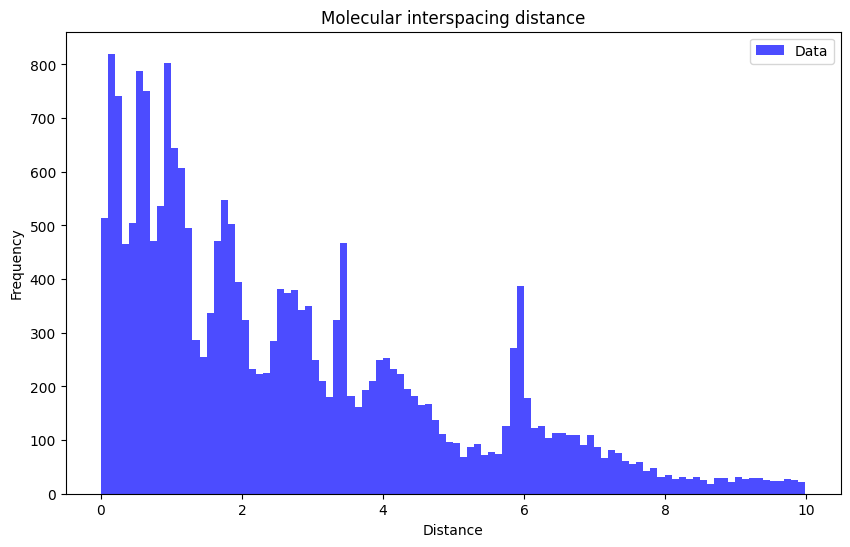

In [7]:
rows = dataframe.shape[0]
bins = 100

statistics = rows/bins

#plotting the data

plt.figure(figsize=(10,6))
plt.title('Molecular interspacing distance')
plt.hist(dataframe['# Distance'], bins=100, color='blue', alpha=0.7, label='Data')
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.legend()
plt.show()


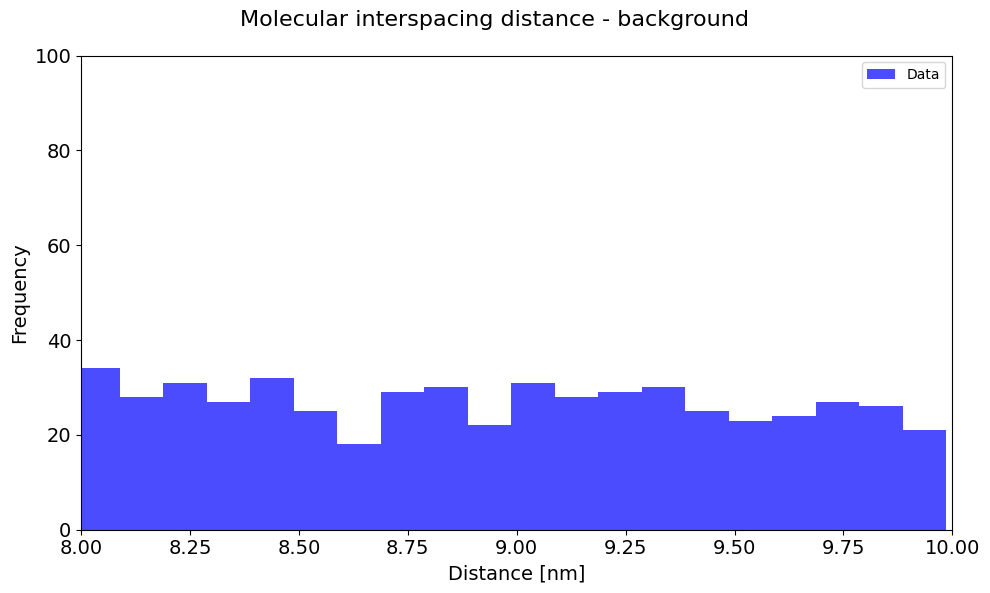

In [8]:
#plotting only from [8, 10]
fig, ax = plt.subplots(figsize=(10,6))
fig.suptitle('Molecular interspacing distance - background', fontsize=16)
ax.hist(dataframe['# Distance'], bins=100, color='blue', alpha=0.7, label='Data')
ax.set_xlim(8,10)
ax.set_ylim(0, 100)
ax.set_xlabel('Distance [nm]', fontsize=14)
ax.set_ylabel('Frequency', fontsize=14)
ax.tick_params(axis='both', labelsize=14)
plt.tight_layout()
plt.legend()


In [9]:
#checking to what extent the background is uniform

#doing a uniform fit


y = dataframe[mask]

y_err = np.sqrt(y)


print(len(y))
bins_mask = 20


def weighted_mean(vals,sigs):
    values = np.array(vals)
    uncertainties = np.array(sigs)

    # Check if lengths match
    if len(values) != len(uncertainties):
        raise ValueError("Values and uncertainties must have the same length.")
    # Check for zero uncertainties to avoid division errors
    if np.any(uncertainties <= 0):
        raise ValueError("Uncertainties must be positive and non-zero.")

    # Calculate the weights
    weights = 1 / (uncertainties ** 2)
    # Calculate the weighted mean
    weighted_mean = np.sum(weights * values) / np.sum(weights)
    # Calculate the uncertainty of the weighted mean
    mean_uncertainty = np.sqrt(1 / np.sum(weights))
    
    
    return weighted_mean, mean_uncertainty

weighted_mean_8_10, weighted_mean_uncertainty_8_10 = weighted_mean(y, y_err)

print(f'Weighted mean: {weighted_mean_8_10} +/- {weighted_mean_uncertainty_8_10}')

538
Weighted mean: 8.918102743191954 +/- 0.12874936563305628


In [10]:
#The idealized uniform distribution is a constant value, so we can use the mean of the data as the expected value for the uniform distribution.


height = 538/20

    

In [11]:
def chi_squared(data, model, errors):
    return np.sum((data - model)**2 / errors**2)

chi_test = chi_squared(y, weighted_mean_8_10, y_err)

N_dof = len(y) - 1

p_val = scp.stats.chi2.sf(chi_test, N_dof)

lprint(r'\chi^2 = %.2f, \quad p = %.2f' % (chi_test, p_val))

#doing it again for the ideal box

chi_box_test = chi_squared(y, height, y_err)

print(chi_box_test)


p_box_val = scp.stats.chi2.sf(chi_box_test, N_dof)

red_chi_box_test = chi_box_test/N_dof

print('red', red_chi_box_test)
lprint(r'\chi^2 = %.2f, \quad p = %.2f' % (chi_box_test, p_box_val))

/Users/annasophiamaxen/Library/Python/3.9/lib/python/site-packages/numpy/_core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/var/folders/bp/h0lnb5j91bn1mykh3m6j0dx00000gn/T/ipykernel_1109/1952065740.py:10: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  lprint(r'\chi^2 = %.2f, \quad p = %.2f' % (chi_test, p_val))
/var/folders/bp/h0lnb5j91bn1mykh3m6j0dx00000gn/T/ipykernel_1109/1952065740.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  lprint(r'\chi^2 = %.2f, \quad p = %.2f' % (chi

<IPython.core.display.Latex object>

# Distance    19526.476918
dtype: float64
red # Distance    36.362154
dtype: float64


/var/folders/bp/h0lnb5j91bn1mykh3m6j0dx00000gn/T/ipykernel_1109/1952065740.py:24: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  lprint(r'\chi^2 = %.2f, \quad p = %.2f' % (chi_box_test, p_box_val))
/var/folders/bp/h0lnb5j91bn1mykh3m6j0dx00000gn/T/ipykernel_1109/1952065740.py:24: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  lprint(r'\chi^2 = %.2f, \quad p = %.2f' % (chi_box_test, p_box_val))


<IPython.core.display.Latex object>

/var/folders/bp/h0lnb5j91bn1mykh3m6j0dx00000gn/T/ipykernel_1109/410558444.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(9.25, 45, f'$\chi^2$: {chi_box_test[0]:.2f}', color='blue', fontsize = 14)
/var/folders/bp/h0lnb5j91bn1mykh3m6j0dx00000gn/T/ipykernel_1109/410558444.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(9.25, 40, f'red $\chi^2$: {red_chi_box_test[0]:.2f}', color='blue', fontsize = 14)


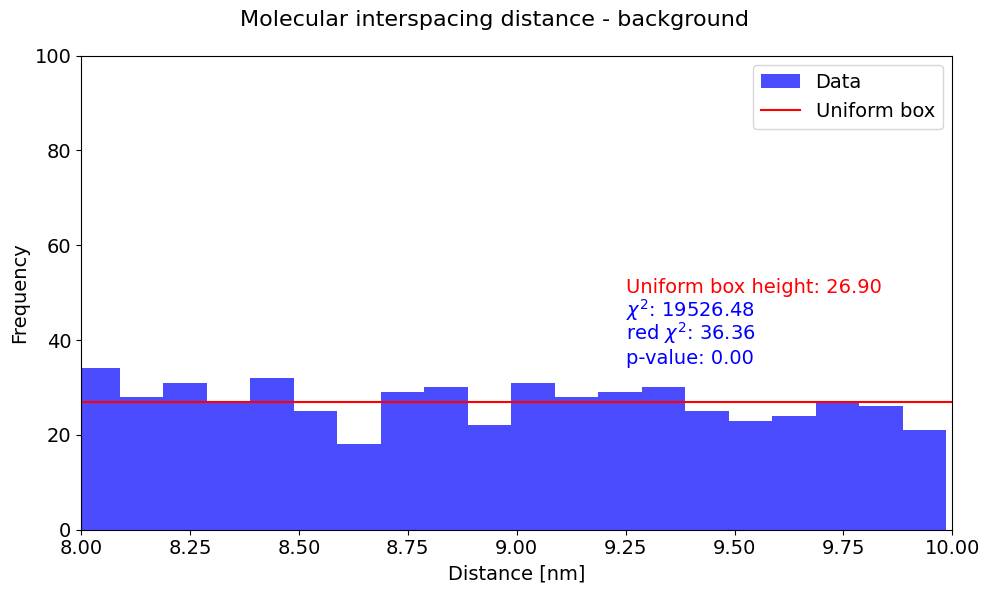

<Figure size 640x480 with 0 Axes>

In [12]:

ax.axhline(height, color='red', label='Uniform box' )
ax.text(9.25, 50, f'Uniform box height: {height:.2f}', color='red', fontsize = 14)
ax.text(9.25, 45, f'$\chi^2$: {chi_box_test[0]:.2f}', color='blue', fontsize = 14)
ax.text(9.25, 40, f'red $\chi^2$: {red_chi_box_test[0]:.2f}', color='blue', fontsize = 14)
ax.text(9.25, 35, f'p-value: {p_box_val[0]:.2f}', color='blue', fontsize = 14)
ax.legend(fontsize=14)
plt.tight_layout()
#fig.savefig('images/background_uniform.png', dpi = 600)

fig


##### 5.1.2

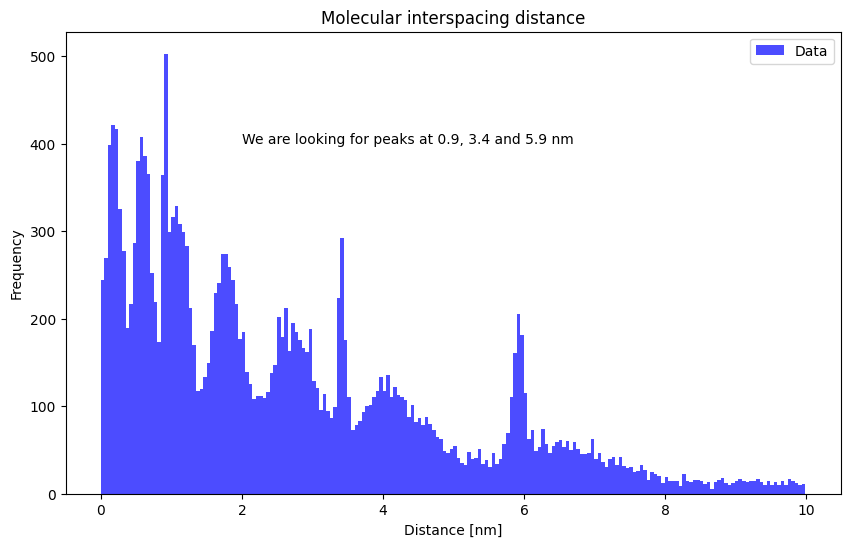

In [13]:
#quick plot of all the data
bins = 200

plt.figure(figsize=(10,6))
plt.title('Molecular interspacing distance')
plt.hist(dataframe['# Distance'], bins=bins, color='blue', alpha=0.7, label='Data')
plt.xlabel('Distance [nm]')
plt.ylabel('Frequency')
plt.legend()
plt.text(2,400,'We are looking for peaks at 0.9, 3.4 and 5.9 nm')
plt.show()


fitting the three gaussian peaks

In [14]:
xmin = 0.7
xmax = 1.05
ranger = xmax-xmin
print(ranger)

bins_on_this_range = 10
print(bins_on_this_range)

dists = dataframe['# Distance']

counts, bin_edges = np.histogram(dists, bins=9, range=(xmin, xmax))


x = (bin_edges[1:] + bin_edges[:-1])/2
y = counts
sy = np.sqrt(counts)
binwidth = bin_edges[1] - bin_edges[0]

counts_whole, bin_edges_whole = np.histogram(dists, bins=200)


x_whole = (bin_edges_whole[1:] + bin_edges_whole[:-1])/2
y_whole = counts_whole
sy_whole = np.sqrt(counts_whole)
binwidth_whole = bin_edges_whole[1] - bin_edges_whole[0]

# Fit the data with a Gaussian
def gauss_pdf(x, mu, sigma, Ngauss, binwidth) :
    """Gaussian"""
    return Ngauss * binwidth * 1.0 / np.sqrt(2*np.pi) / sigma * np.exp( -0.5 * (x-mu)**2 / sigma**2)

def additional_gauss(x, N, mu, sigma, cst) :
    norm = N / (np.sqrt(2.0 * np.pi) * sigma)
    z = (x - mu) / sigma
    return norm * np.exp(-0.5 * z * z) + cst

binwidth_gauss = (xmax-xmin) / float(bins)

gauss_fit = cost.LeastSquares(x, y, sy, additional_gauss)

m_fit = Minuit(gauss_fit, N=500, mu=0.9, sigma=0.1, cst = 0)

m_fit.migrad()

0.3500000000000001
10


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 50.13 (χ²/ndof = 10.0)     │              Nfcn = 571              │
│ EDM = 8.52e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ N     │   19.0    │    1.7    │            │            │         │         │       │
│ 1 │ mu    │  0.9166   │  0.0027   │            │            │         │         │       │
│ 2 │ sigma │  0.0305   │  0.0024   │            │            │         │         │       │
│ 3 │ cst   │    177    │     6     │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬─────────────────────────────────────────┐
│       │         N        mu     sigma       cst │
├───────┼─────────────────────────────────────────┤
│     N │      2.73    557e-6  2.055e-3      -5.7 │
│    mu │    557e-6  7.09e-06      2e-6 -1.590e-3 │
│ sigma │  2.055e-3      2e-6  5.68e-06 -5.869e-3 │
│   cst │      -5.7 -1.590e-3 -5.869e-3      35.9 │
└───────┴─────────────────────────────────────────┘

In [15]:
p_value1 = scp.stats.chi2.sf(m_fit.fval, len(x)-4)

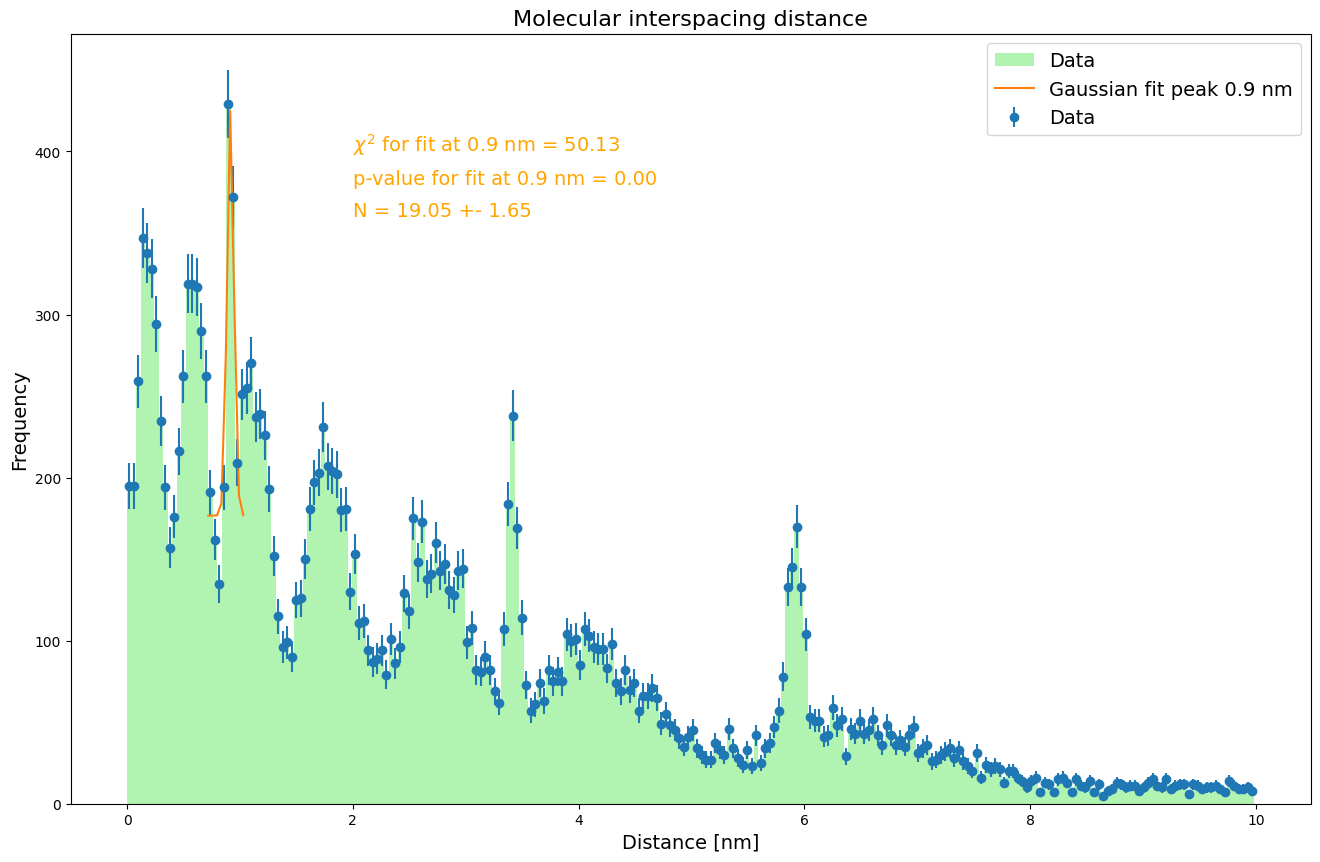

In [16]:
#whole data set

counts_whole, bin_edges_whole = np.histogram(dists, bins=250)


x_whole = (bin_edges_whole[1:] + bin_edges_whole[:-1])/2
y_whole = counts_whole
sy_whole = np.sqrt(counts_whole)
binwidth_whole = bin_edges_whole[1] - bin_edges_whole[0]

#plotting the fit on top of the data

fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111)
ax.errorbar(x_whole, y_whole, yerr=sy_whole, fmt='o', label='Data')
ax.hist(dataframe['# Distance'], bins=250, color='lightgreen', alpha=0.7, label='Data')
ax.set_xlabel('Distance [nm]', fontsize=14)
ax.set_ylabel('Frequency', fontsize=14)
ax.set_title('Molecular interspacing distance', fontsize=16)
ax.plot(x, additional_gauss(x, *m_fit.values), label='Gaussian fit peak 0.9 nm')
ax.text(2, 400, f'$\chi^2$ for fit at 0.9 nm = {m_fit.fval:.2f}', color='orange', fontsize = 14)
ax.text(2, 380, f'p-value for fit at 0.9 nm = {p_value1:.2f}', color = 'orange', fontsize = 14)
ax.text(2, 360, f'N = {m_fit.values["N"]:.2f} +- {m_fit.errors["N"]:.2f}', color = 'orange', fontsize = 14)
ax.legend(fontsize=14)
plt.show()
#fig.savefig('images/fit_0.9nm.png', dpi = 600)


In [17]:
xmin = 3.2
xmax = 3.7
ranger = xmax-xmin
print(ranger)

bins_on_this_range = 10
print(bins_on_this_range)

dists = dataframe['# Distance']

counts, bin_edges = np.histogram(dists, bins=13, range=(xmin, xmax))


x = (bin_edges[1:] + bin_edges[:-1])/2
y = counts
sy = np.sqrt(counts)
binwidth = bin_edges[1] - bin_edges[0]

counts_whole, bin_edges_whole = np.histogram(dists, bins=200)


x_whole = (bin_edges_whole[1:] + bin_edges_whole[:-1])/2
y_whole = counts_whole
sy_whole = np.sqrt(counts_whole)
binwidth_whole = bin_edges_whole[1] - bin_edges_whole[0]

# Fit the data with a Gaussian
def gauss_pdf(x, mu, sigma, Ngauss, binwidth) :
    """Gaussian"""
    return Ngauss * binwidth * 1.0 / np.sqrt(2*np.pi) / sigma * np.exp( -0.5 * (x-mu)**2 / sigma**2)

def additional_gauss(x, N, mu, sigma, cst) :
    norm = N / (np.sqrt(2.0 * np.pi) * sigma)
    z = (x - mu) / sigma
    return norm * np.exp(-0.5 * z * z) + cst

binwidth_gauss = (xmax-xmin) / float(bins)

gauss_fit = cost.LeastSquares(x, y, sy, additional_gauss)

m_fit = Minuit(gauss_fit, N=600, mu=3.4, sigma=0.1, cst = 0)

m_fit.migrad()

0.5
10


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 9.004 (χ²/ndof = 1.0)      │              Nfcn = 464              │
│ EDM = 2.8e-06 (Goal: 0.0002)     │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ N     │   19.2    │    1.4    │            │            │         │         │       │
│ 1 │ mu    │  3.4153   │  0.0032   │            │            │         │         │       │
│ 2 │ sigma │  0.0460   │  0.0031   │            │            │         │         │       │
│ 3 │ cst   │   62.3    │    3.1    │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬─────────────────────────────────────────┐
│       │         N        mu     sigma       cst │
├───────┼─────────────────────────────────────────┤
│     N │      1.94  0.059e-3  2.122e-3      -2.4 │
│    mu │  0.059e-3  1.03e-05      0e-6 -0.118e-3 │
│ sigma │  2.122e-3      0e-6  9.49e-06 -4.244e-3 │
│   cst │      -2.4 -0.118e-3 -4.244e-3      9.62 │
└───────┴─────────────────────────────────────────┘

In [18]:
p_val2 = scp.stats.chi2.sf(m_fit.fval, len(x)-4)

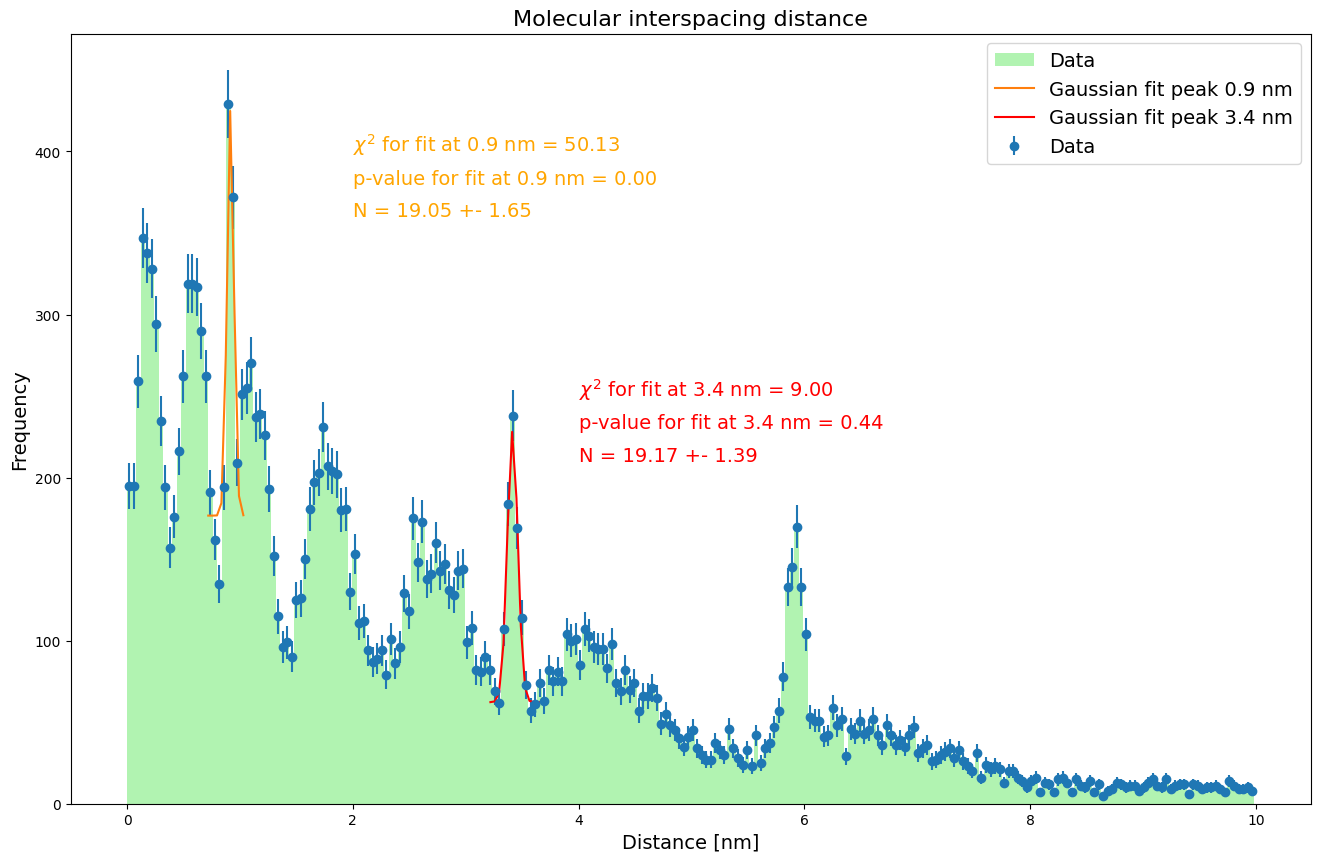

In [19]:
#adding the new peak to the plot

ax.plot(x, additional_gauss(x, *m_fit.values), label='Gaussian fit peak 3.4 nm', color = 'red')
ax.text(4, 250, f'$\chi^2$ for fit at 3.4 nm = {m_fit.fval:.2f}', color='red', fontsize = 14)
ax.text(4, 230, f'p-value for fit at 3.4 nm = {p_val2:.2f}', color = 'red', fontsize = 14)
ax.text(4, 210, f'N = {m_fit.values["N"]:.2f} +- {m_fit.errors["N"]:.2f}', color = 'red', fontsize = 14)
ax.legend(fontsize=14)
fig.savefig('images/fit_3.4nm.png', dpi = 600)
fig


In [20]:
#next is the peak at 5.9 nm

xmin = 5.7
xmax = 6.2

ranger = xmax-xmin
print(ranger)

bins_on_this_range = 10
print(bins_on_this_range)

dists = dataframe['# Distance']

counts, bin_edges = np.histogram(dists, bins=12, range=(xmin, xmax))


x = (bin_edges[1:] + bin_edges[:-1])/2
y = counts
sy = np.sqrt(counts)
binwidth = bin_edges[1] - bin_edges[0]

counts_whole, bin_edges_whole = np.histogram(dists, bins=200)


x_whole = (bin_edges_whole[1:] + bin_edges_whole[:-1])/2
y_whole = counts_whole
sy_whole = np.sqrt(counts_whole)
binwidth_whole = bin_edges_whole[1] - bin_edges_whole[0]

# Fit the data with a Gaussian
def gauss_pdf(x, mu, sigma, Ngauss, binwidth) :
    """Gaussian"""
    return Ngauss * binwidth * 1.0 / np.sqrt(2*np.pi) / sigma * np.exp( -0.5 * (x-mu)**2 / sigma**2)

def additional_gauss(x, N, mu, sigma, cst) :
    norm = N / (np.sqrt(2.0 * np.pi) * sigma)
    z = (x - mu) / sigma
    return norm * np.exp(-0.5 * z * z) + cst

binwidth_gauss = (xmax-xmin) / float(bins)

gauss_fit = cost.LeastSquares(x, y, sy, additional_gauss)

m_fit = Minuit(gauss_fit, N=10, mu=5.9, sigma=0.1, cst = 0)

m_fit.migrad()

0.5
10


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 7.069 (χ²/ndof = 0.9)      │              Nfcn = 117              │
│ EDM = 4.96e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ N     │   21.7    │    1.9    │            │            │         │         │       │
│ 1 │ mu    │   5.919   │   0.005   │            │            │         │         │       │
│ 2 │ sigma │   0.068   │   0.005   │            │            │         │         │       │
│ 3 │ cst   │    47     │     4     │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬─────────────────────────────────────────────┐
│       │          N         mu      sigma        cst │
├───────┼─────────────────────────────────────────────┤
│     N │        3.6  -0.263e-3   5.992e-3         -5 │
│    mu │  -0.263e-3   2.14e-05  -0.001e-3   0.493e-3 │
│ sigma │   5.992e-3  -0.001e-3   2.48e-05 -11.874e-3 │
│   cst │         -5   0.493e-3 -11.874e-3       14.5 │
└───────┴─────────────────────────────────────────────┘

In [21]:
p_val3 = scp.stats.chi2.sf(m_fit.fval, len(x)-4)

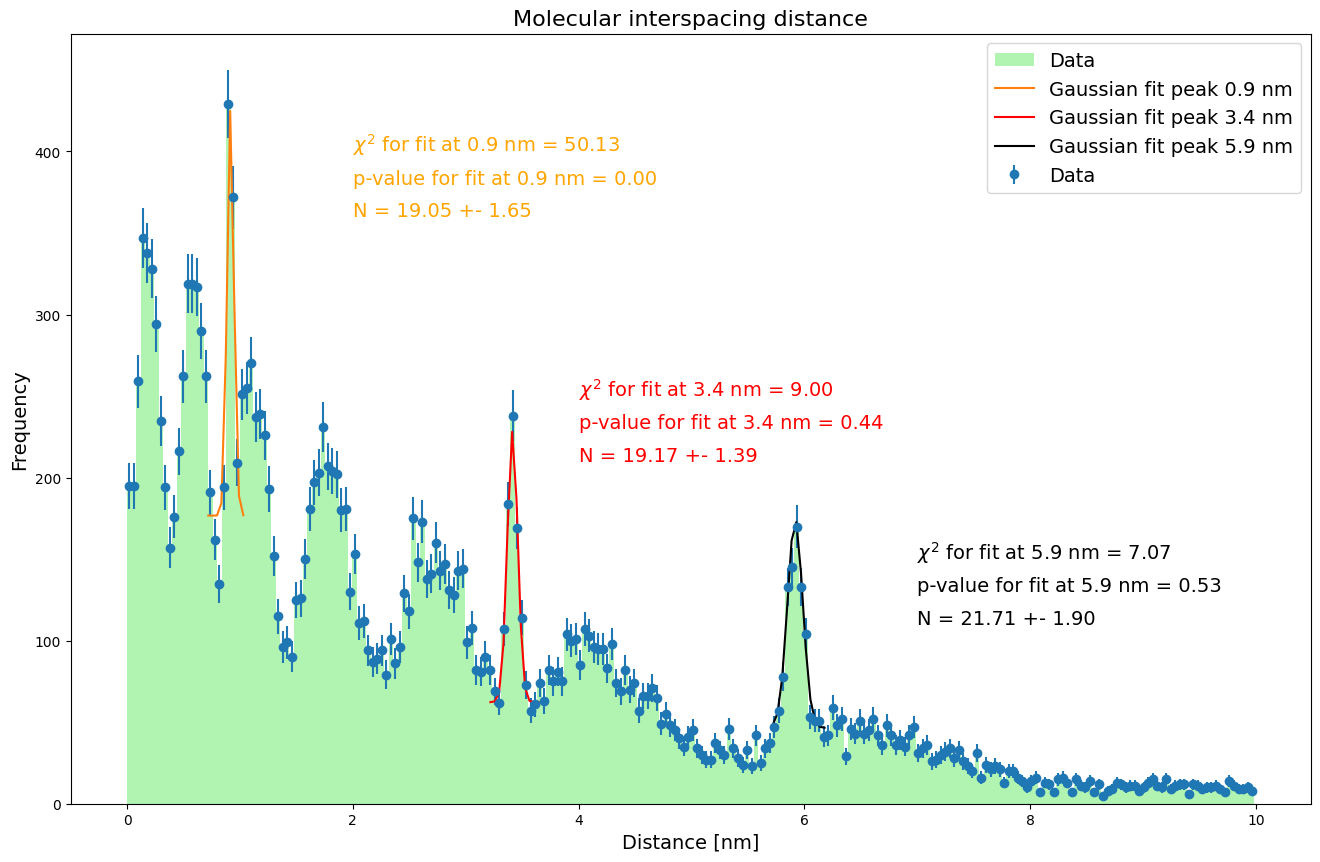

In [22]:
#adding the third peak to the plot

ax.plot(x, additional_gauss(x, *m_fit.values), label='Gaussian fit peak 5.9 nm', color = 'black')
ax.text(7, 150, f'$\chi^2$ for fit at 5.9 nm = {m_fit.fval:.2f}', color='black', fontsize = 14)
ax.text(7, 130, f'p-value for fit at 5.9 nm = {p_val3:.2f}', color = 'black', fontsize = 14)
ax.text(7, 110, f'N = {m_fit.values["N"]:.2f} +- {m_fit.errors["N"]:.2f}', color = 'black', fontsize = 14)
ax.legend(fontsize=14)
fig.savefig('images/fit_5.9nm.png', dpi = 600)
fig

In [23]:
N_s = [19.05, 19.17, 21.71]
sigs = [1.65, 1.39, 1.90]



In [24]:


#trying to fit the whole data set

xmin = 0
xmax = 3.6

counts_whole, bin_edges_whole = np.histogram(dists, bins=90, range=(xmin, xmax))


x_whole_1 = (bin_edges_whole[1:] + bin_edges_whole[:-1])/2
y_whole = counts_whole
sy_whole = np.sqrt(counts_whole)
binwidth_whole = bin_edges_whole[1] - bin_edges_whole[0]

def six_gauss(x, N_first, N_second, N_third, N_fourth, N_fifth, N_sixth, mu_1, mu_2, mu_3, mu_4, mu_5, mu_6, sigma, sigma6, cst):
    return additional_gauss(x, N_first, mu_1, sigma, cst) + additional_gauss(x, N_second, mu_2, sigma, cst) + additional_gauss(x, N_third, mu_3, sigma, cst) + additional_gauss(x, N_fourth, mu_4, sigma, cst) + additional_gauss(x, N_fifth, mu_5, sigma, cst) + additional_gauss(x, N_sixth, mu_6, sigma6, cst)

#fitting eith the double gauss

six_fit = cost.LeastSquares(x_whole_1, y_whole, sy_whole, six_gauss)

mfit = Minuit(six_fit, N_first=10, N_second=10, N_third=5, N_fourth=40, N_fifth=15, N_sixth=100, mu_1=0.3, mu_2=0.6, mu_3=0.9, mu_4=1.8, mu_5=2.5, mu_6=3.4, sigma=0.1, sigma6=0.1, cst=1.0)

mfit.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 431.7 (χ²/ndof = 5.8)      │             Nfcn = 1400              │
│ EDM = 1.88e-05 (Goal: 0.0002)    │            time = 0.1 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name     │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ N_first  │   72.8    │    2.7    │            │            │         │         │       │
│ 1 │ N_second │   69.1    │    2.6    │            │            │         │         │       │
│ 2 │ N_third  │   70.0    │    2.7    │            │            │         │         │       │
│ 3 │ N_fourth │   49.4    │    2.6    │            │            │         │         │       │
│ 4 │ N_fifth  │   27.4    │    2.3    │            │            │         │         │       │
│ 5 │ N_sixth  │   14.6    │    1.2    │            │            │         │         │       │
│ 6 │ mu_1     │   0.168   │   0.006   │            │            │         │         │       │
│ 7 │ mu_2     │   0.602   │   0.006   │            │            │         │         │       │
│ 8 │ mu_3     │   1.062   │   0.007   │            │            │         │         │       │
│ 9 │ mu_4     │   1.772   │   0.008   │            │            │         │         │       │
│ 10│ mu_5     │   2.694   │   0.016   │            │            │         │         │       │
│ 11│ mu_6     │  3.4142   │  0.0035   │            │            │         │         │       │
│ 12│ sigma    │   0.137   │   0.004   │            │            │         │         │       │
│ 13│ sigma6   │  0.0381   │  0.0029   │            │            │         │         │       │
│ 14│ cst      │   14.6    │    0.4    │            │            │         │         │       │
└───┴──────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│          │   N_first  N_second   N_third  N_fourth   N_fifth   N_sixth      mu_1      mu_2      mu_3      mu_4      mu_5      mu_6     sigma    sigma6       cst │
├──────────┼───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│  N_first │       7.4         1         2         2         2       0.6  -1.79e-3  3.186e-3   3.01e-3   0.89e-3   1.30e-3  0.075e-3  3.463e-3    896e-6     -0.47 │
│ N_second │         1       6.7         1         2         1       0.5  -4.26e-3 -0.474e-3   4.25e-3   0.59e-3   0.64e-3  0.062e-3  1.990e-3    744e-6     -0.39 │
│  N_third │         2         1      7.38         3         2       0.6  -3.43e-3 -1.774e-3   0.98e-3   1.20e-3   1.76e-3  0.088e-3  4.537e-3  1.050e-3     -0.55 │
│ N_fourth │         2         2         3      6.52         2       0.7  -3.00e-3  0.464e-3   2.90e-3   1.02e-3   1.81e-3  0.095e-3  4.715e-3  1.135e-3     -0.59 │
│  N_fifth │         2         1         2         2      5.09       0.6  -2.65e-3  0.458e-3   2.74e-3   1.04e-3   1.04e-3  0.08

In [25]:
p_val6 = scp.stats.chi2.sf(mfit.fval, len(x_whole)-13)

In [26]:
counts_whole, bin_edges_whole = np.histogram(dists, bins=250)


x_whole = (bin_edges_whole[1:] + bin_edges_whole[:-1])/2
y_whole = counts_whole
sy_whole = np.sqrt(counts_whole)
binwidth_whole = bin_edges_whole[1] - bin_edges_whole[0]

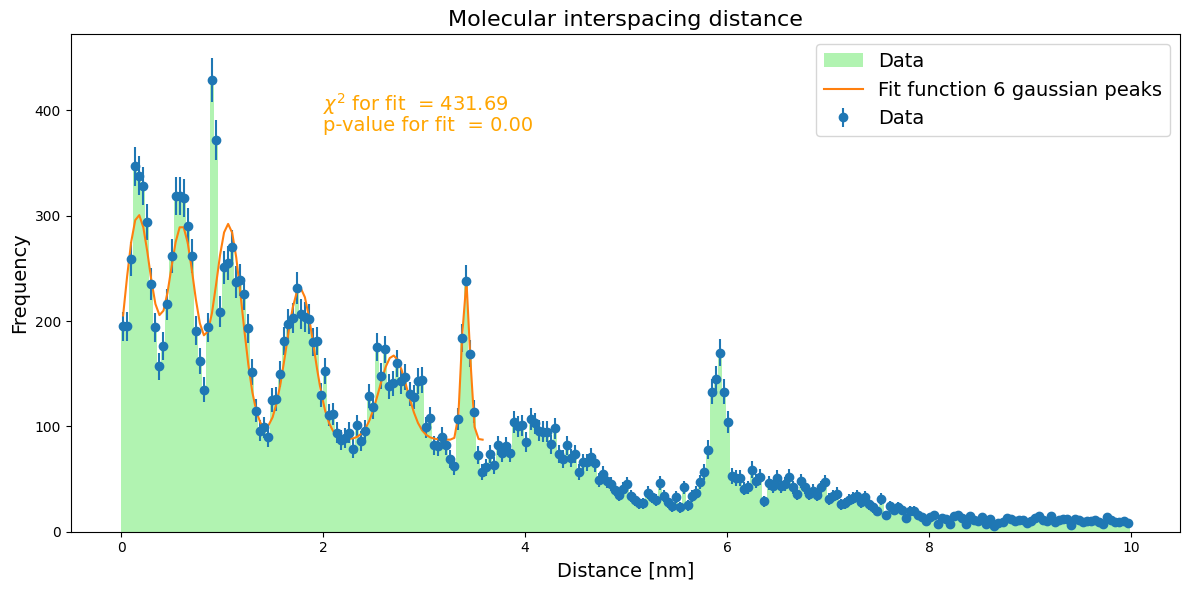

In [27]:
#plotting the fit on top of the data

fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)

ax.hist(dists, bins=250, color='lightgreen', alpha=0.7, label='Data')
ax.errorbar(x_whole, y_whole, yerr=sy_whole, fmt='o', label='Data')
ax.set_xlabel('Distance [nm]', fontsize=14)
ax.set_ylabel('Frequency', fontsize=14)
ax.set_title('Molecular interspacing distance', fontsize=16)
ax.plot(x_whole_1, six_gauss(x_whole_1, *mfit.values), label='Fit function 6 gaussian peaks')
ax.text(2, 400, f'$\chi^2$ for fit  = {mfit.fval:.2f}', color='orange', fontsize = 14)
ax.text(2, 380, f'p-value for fit  = {p_val6:.2f}', color = 'orange', fontsize = 14)
plt.tight_layout()
ax.legend(fontsize=14)
plt.show()

In [28]:
#fitting the rest

xmin = 3.5
xmax = 7

counts_whole, bin_edges_whole = np.histogram(dists, bins=90, range=(xmin, xmax))


x_whole_1 = (bin_edges_whole[1:] + bin_edges_whole[:-1])/2
y_whole = counts_whole
sy_whole = np.sqrt(counts_whole)
binwidth_whole = bin_edges_whole[1] - bin_edges_whole[0]


def two_gauss(x, N_first, N_second, mu_1, mu_2, sigma1, sigma2, cst):
    return additional_gauss(x, N_first, mu_1, sigma1, cst) + additional_gauss(x, N_second, mu_2, sigma2, cst)

#fitting eith the double gauss

double_fit = cost.LeastSquares(x_whole_1, y_whole, sy_whole, two_gauss)

mfit = Minuit(double_fit, N_first=1000, N_second=400, mu_1=4, mu_2=5.9, sigma1=1, sigma2=0.1, cst=1.0)

mfit.migrad()



┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 116.1 (χ²/ndof = 1.4)      │              Nfcn = 691              │
│ EDM = 1.49e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name     │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ N_first  │   56.2    │    3.1    │            │            │         │         │       │
│ 1 │ N_second │   23.7    │    1.3    │            │            │         │         │       │
│ 2 │ mu_1     │   4.074   │   0.019   │            │            │         │         │       │
│ 3 │ mu_2     │   5.920   │   0.005   │            │            │         │         │       │
│ 4 │ sigma1   │   0.382   │   0.020   │            │            │         │         │       │
│ 5 │ sigma2   │   0.078   │   0.005   │            │            │         │         │       │
│ 6 │ cst      │   17.8    │    0.5    │            │            │         │         │       │
└───┴──────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────────────────────────────────────────────────────┐
│          │   N_first  N_second      mu_1      mu_2    sigma1    sigma2       cst │
├──────────┼───────────────────────────────────────────────────────────────────────┤
│  N_first │      9.56       0.9  -7.91e-3  0.191e-3   39.3e-3  2.628e-3     -0.88 │
│ N_second │       0.9      1.77   0.63e-3  0.075e-3    4.0e-3  2.509e-3     -0.21 │
│     mu_1 │  -7.91e-3   0.63e-3  0.000349  0.002e-3  -0.06e-3  0.003e-3  -0.39e-3 │
│     mu_2 │  0.191e-3  0.075e-3  0.002e-3  2.13e-05 -0.001e-3  0.001e-3 -0.012e-3 │
│   sigma1 │   39.3e-3    4.0e-3  -0.06e-3 -0.001e-3  0.000397  0.012e-3   -3.7e-3 │
│   sigma2 │  2.628e-3  2.509e-3  0.003e-3  0.001e-3  0.012e-3  2.19e-05 -0.640e-3 │
│      cst │     -0.88     -0.21  -0.39e-3 -0.012e-3   -3.7e-3 -0.640e-3     0.232 │
└──────────┴───────────────────────────────────────────────────────────────────────┘

In [29]:
p_val_last = scp.stats.chi2.sf(mfit.fval, len(x_whole)-6)

In [30]:
#plotting this fit on top of the previous

In [33]:
ax.plot(x_whole_1, two_gauss(x_whole_1, *mfit.values), label='Double gaussian fit last peaks', color = 'black', )
ax.text(7, 150, f'$\chi^2$ for fit  = {mfit.fval:.2f}', color='black', fontsize = 14)
ax.text(7, 130, f'p-value for fit  = {p_val_last:.2f}', color = 'black', fontsize = 14)
ax.legend(fontsize=14)
ax.tick_params(axis='both', labelsize=14)
fig.savefig('images/fit_last_peaks_no_background.png', dpi = 600)
fig

AttributeError: 'function' object has no attribute 'set_zorder'

In [602]:
#fitting the last background noise

xmin = 7
xmax = 10

def exp(x, N, tau, cst):
    return N * np.exp(-x/tau) + cst

counts, bin_edges = np.histogram(dists, bins=60, range=(xmin, xmax))

x = (bin_edges[1:] + bin_edges[:-1])/2
y = counts
sy = np.sqrt(counts)

exp_fit = cost.LeastSquares(x, y, sy, exp)

mfit = Minuit(exp_fit, N=100, tau=1, cst=1)

mfit.migrad()



┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 63.39 (χ²/ndof = 1.1)      │              Nfcn = 545              │
│ EDM = 0.639 (Goal: 0.0002)       │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│         INVALID Minimum          │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           ABOVE call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │        Covariance APPROXIMATE        │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ N    │  16.7e3   │   3.0e3   │            │            │         │         │       │
│ 1 │ tau  │   1.120   │   0.032   │            │            │         │         │       │
│ 2 │ cst  │    6.8    │    0.9    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌─────┬────────────────────────────┐
│     │        N      tau      cst │
├─────┼────────────────────────────┤
│   N │ 8.81e+06 -83.8930    110.9 │
│ tau │ -83.8930 0.000991 -11.7e-3 │
│ cst │    110.9 -11.7e-3    0.844 │
└─────┴────────────────────────────┘

In [603]:
p_val_last = scp.stats.chi2.sf(mfit.fval, len(x)-3)

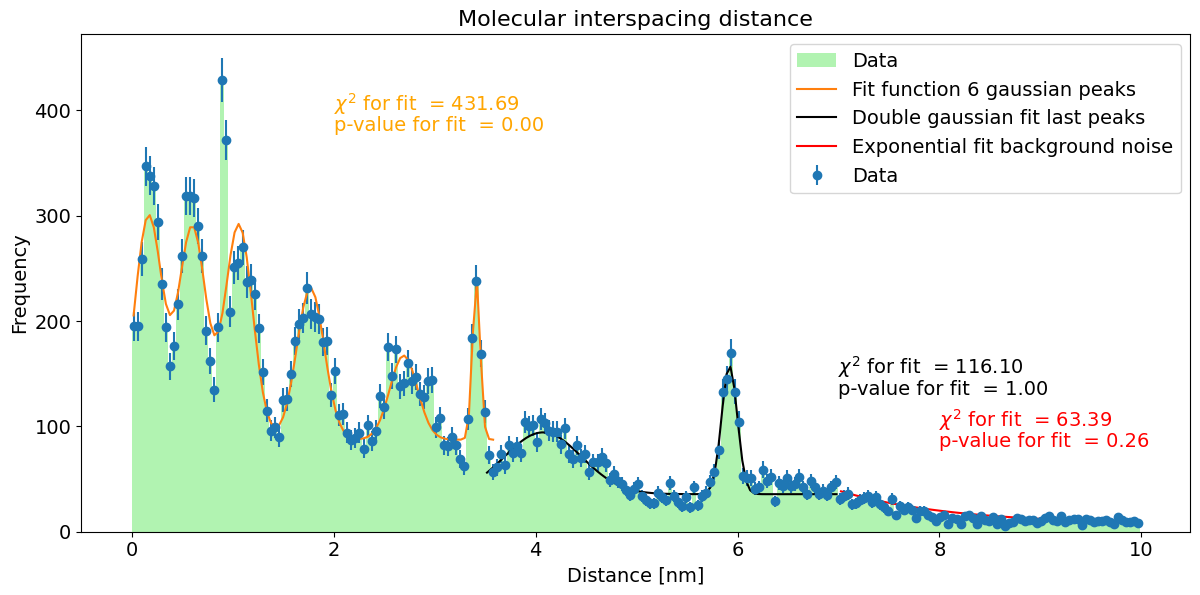

In [604]:
#plotting the last part of the fit 

ax.plot(x, exp(x, *mfit.values), label='Exponential fit background noise', color = 'red')
ax.text(8, 100, f'$\chi^2$ for fit  = {mfit.fval:.2f}', color='red', fontsize = 14)
ax.text(8, 80, f'p-value for fit  = {p_val_last:.2f}', color = 'red', fontsize = 14)
ax.legend(fontsize=14)
ax.tick_params(axis='both', labelsize=14)
fig.savefig('images/fit_last_background.png', dpi = 600)
fig
